## Анализ данных развлекательного приложения Procrastinate Pro+. <br>
Мы — маркетинговые аналитики развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.<br>

Цель проекта: разобраться в причинах убытков компании и помочь выйти в плюс. <br>
        
Задачи проекта: изучить следующие показатели: <br>
- откуда приходят пользователи и какими устройствами они пользуются, <br>
- сколько стоит привлечение пользователей из различных рекламных каналов; <br>
- сколько денег приносит каждый клиент, <br>
- когда расходы на привлечение клиента окупаются, <br>
- какие факторы мешают привлечению клиентов.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:<br>
- `visits_info_short.csv` - лог сервера с данными об посещениях пользователей,<br>
- `orders_info_short.csv` - информацию о заказах,<br>
- `costs_info_short.csv` - рекламные расходы.<br>


### Загружаем данные и подготовливаем их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.


Изучим данные и выполним предобработку. Проверим пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Посмотрим на столбцы с датой и временем.

In [9]:
# Импортируем библиотеки для работы
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

# Загружаем файлы в переменные
visits_info = pd.read_csv('/datasets/visits_info_short.csv') # о визитах,
orders_info = pd.read_csv('/datasets/orders_info_short.csv') # o заказах, 
costs_info = pd.read_csv('/datasets/costs_info_short.csv')   # o рекламных расходах

In [10]:
# Предварительно знакомимся с данными таблицы о визитах

print('Информация по таблице:')
print ()
print (visits_info.info())
print ()
print('Количество дубликатов:', visits_info.duplicated().sum())

visits_info.head(10)

Информация по таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Количество дубликатов: 0


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05



Видим таблицу о визитах с 6 столбцами и 309901 строк. Столбцы дают информацию про:<br>
`User Id` — уникальный идентификатор пользователя,<br>
`Region` — страна пользователя,<br>
`Device` — тип устройства пользователя,<br>
`Channel` — идентификатор источника перехода,<br>
`Session Start` — дата и время начала сессии,<br>
`Session End` — дата и время окончания сессии.<br>

В типах данных необходимо перевести со строкового типа на дату в последних двух столбцах. <br>
Пропусков нет. Дубликатов нет. <br>
Названия столбцов нужно привести в порядок по правилам: нижний регистр, без пробелов и с нижним подчеркиванием. 


In [11]:
# Предварительно знакомимся с данными таблицы о заказах

print('Информация по таблице:')
print ()
print (orders_info.info())
print ()
print('Количество дубликатов:', orders_info.duplicated().sum())

orders_info.head(10)

Информация по таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Количество дубликатов: 0


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99



Видим таблицу о заказах с 3 столбцами и 40212 строками. Столбцы дают информаци про:<br>
`User Id` — уникальный идентификатор пользователя,<br>
`Event Dt` — дата и время покупки,<br>
`Revenue` — сумма заказа.<br>

Типа данных "дата и время покупки" - имеет строковый тип, необходимо изменить на тип даты.<br>
Пропсуков нет. Дубликатов нет.<br>
Названия столбцов нужно привести в порядок по правилам: нижний регистр, без пробелов и с нижним подчеркиванием. 


In [12]:
# Предварительно знакомимся с данными таблицы о рекламных расходах

print('Информация по таблице:')
print ()
print (costs_info.info())
print ()
print('Количество дубликатов:', costs_info.duplicated().sum())

costs_info.head(10)

Информация по таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Количество дубликатов: 0


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5



Видим таблицу о рекламных расходах с 3 столбцами и 1800 строк. Столбцы дают информацию про:<br>
`dt` — дата проведения рекламной кампании,<br>
`Channel` — идентификатор рекламного источника,<br>
`costs` — расходы на эту кампанию.<br>

Столбец с датой имеет строковый тип данных, который необходимо изменить. <br>
Пропусков нет. Дубликатов нет. <br>
Названия столбцов нужно привести в порядок по правилам: нижний регистр.


In [13]:
# Приводим названия столбцов к нижнему регистру
# Изменяем названия столбцов в таблицах:

visits_info.columns = visits_info.columns.str.lower().str.replace(' ', '_')
orders_info.columns = orders_info.columns.str.lower().str.replace(' ', '_')
costs_info.columns = costs_info.columns.str.lower()

# Проверяем
print (visits_info.columns, '\n', orders_info.columns, '\n', costs_info.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object') 
 Index(['user_id', 'event_dt', 'revenue'], dtype='object') 
 Index(['dt', 'channel', 'costs'], dtype='object')


In [14]:
# Меняем тип данных времени 
visits_info['session_start'] = pd.to_datetime(visits_info['session_start'])
visits_info['session_end'] = pd.to_datetime(visits_info['session_end'])
orders_info['event_dt'] = pd.to_datetime(orders_info['event_dt'])
costs_info['dt'] = pd.to_datetime(costs_info['dt']).dt.date 


Таким образом мы закончили первый шаг в анализе. Мы загрузили необходимые таблицы в переменные, предварительно ознакомились с данными, сделали подготовку данных: во всех таблицах изменили названия столбцов, изменили типы данных у столбцов с датой и временем. Проверили на пропуски и дубликатов, которых не обнаружили. <br>

Переходим к следующему этапу. 

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [15]:
# Зададим функцию для создания пользовательских профилей пользователей get_profiles()

def get_profiles(visits_info, orders_info, costs_info):

    # находим параметры первых посещений
    profiles = (
        visits_info.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders_info['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs_info = costs_info.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs_info['acquisition_cost'] = costs_info['costs'] / costs_info['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs_info[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [16]:
# Зададим функцию для рассчёта удержания Retention Rate - get_retention

def get_retention(
    profiles,
    visits_info,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits_info[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# Зададим функцию для подсчёта конверсии - get_conversion()

def get_conversion(
    profiles,
    orders_info,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_order = (
        orders_info.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_order[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [18]:
# Зададим функцию для подсчёта LTV и ROI- get_ltv()

def get_ltv(
    profiles,
    orders_info,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders_info[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [19]:
# Зададим функцию для сглаживания данных - filter_data()

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [20]:
# Зададим функцию для построения графика Retention Rate - plot_retention()

def plot_retention(retention, retention_history, horizon_days, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon_days - 1]
    ]

    # если в индексах таблицы удержания только payer, добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки. 
    # В первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Удержание')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих, вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Удержание')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon_days
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon_days
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [21]:
# Зададим функцию для построения графика конверсии - plot_conversion()

def plot_conversion(conversion, conversion_history, horizon_days, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon_days - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('% конверсии')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show() 

In [22]:
# Зададим функцию для визуализации LTV и ROI - plot_ltv_roi 

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon_days - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon_days - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('LTV, у.е.')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon_days))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('ROI')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show() 


На данном этапе мы завершили подготовку с функциями для вычисления значений метрик, которые будут использованы в дальнейшем при анализе. Мы подготовили следующие функции: <br>
get_profiles() — для создания профилей пользователей, <br>
get_retention() — для подсчёта Retention Rate, <br>
get_conversion() — для подсчёта конверсии, <br>
get_ltv() — для подсчёта LTV и ROI. <br>
 <br>
А также функции для построения графиков: <br>
 <br>
filter_data() — для сглаживания данных, <br>
plot_retention() — для построения графика Retention Rate, <br>
plot_conversion() — для построения графика конверсии, <br>
plot_ltv_roi — для визуализации LTV и ROI.


### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


####  Составляем профили пользователей. Определяем минимальную и максимальную даты привлечения пользователей.


In [23]:
# Получаем профили пользователей
profiles = get_profiles(visits_info, orders_info, costs_info)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:
# Определим минимальную и максимальную даты привлечения пользователей.
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  # момент анализа
horizon_days = 14  # горизонт анализа

print ('Минимальная дата привлечения пользователей:', min_analysis_date)
print ('Максимальная дата привлечения пользователей:',observation_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27



Промежуточный вывод.<br>
    
Мы создали таблицу с профилями пользователей, которая состоит из 9 столбцов и 150008 строк, с помощью функции get_profiles(), которую написали этапом ранее. На основе таблицы с информацией о посещениях сайта, расчитали еще столбцы с данными:<br>
- `dt` - дата первого посещения на сайт,<br>
- `month` - первый день месяца, в который это посещение произошло,<br>
- `payer` - признак платящих пользователей (имеет логический тип данных),<br>
- `acquisition_cost` - стоимость привлечения пользователя.<br>
   
    <br>
Действительно, минимальную и максимальную даты привлечения пользователей определили верно. Согласно поставленному заданию у нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.
    
    

#### Выясняем, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [18]:
# Определяем из каких стран пользователи приходят в приложение 

profiles.groupby('region')['user_id'].count().sort_values(ascending=False)

region
United States    100002
UK                17575
France            17450
Germany           14981
Name: user_id, dtype: int64

In [19]:
# Определяем на какую страну приходится больше всего платящих пользователей

profiles.groupby('region')['payer'].sum().sort_values(ascending=False).head(1)

region
United States    6902
Name: payer, dtype: int64

In [20]:
# Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
r = profiles.groupby('region')[['user_id', 'payer']].agg({'user_id':'count', 'payer':'sum'}).reset_index()
r['part_payer'] = round(r['payer']/r['user_id']*100, 2)
r

,region,user_id,payer,part_payer
0,France,17450,663,3.80
1,Germany,14981,616,4.11
2,UK,17575,700,3.98
3,United States,100002,6902,6.90



Промежуточный вывод.<br>


Мы определили, что пользователи приходят в приложение из США, Англии, Франции и Германии (страны указаны в порядке убывания количества пользователей). <br>
Больше всего платящих пользователей приходят из США.<br>
Также мы построили таблицу, где видна доля платящих пользователей на каждую страну. Так, самый высокий процент у США = 6,9%, у Германии = 4,11% (хотя количество пользователей в этой стране самое наименьшее), у Англии = 3,98%, у Франции = 3,8%


#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.


In [21]:
# Определяем какими устройствами пользуются клиенты:  

profiles.groupby('device')['user_id'].count().sort_values(ascending=False)

device
iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: user_id, dtype: int64

In [22]:
# Определяем какие устройства предпочитают платящие пользователи. 

profiles.groupby('device')['payer'].sum().sort_values(ascending=False)

device
iPhone     3382
Android    2050
Mac        1912
PC         1537
Name: payer, dtype: int64

In [23]:
# Строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

d = profiles.groupby('device')[['user_id', 'payer']].agg({'user_id':'count', 'payer':'sum'}).reset_index()
d['part_payer'] = round(d['payer']/d['user_id']*100, 2)
d.sort_values(by='part_payer', ascending=False)

,device,user_id,payer,part_payer
1,Mac,30042,1912,6.36
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
2,PC,30455,1537,5.05



Промежуточный вывод.<br>
<br>
Мы определили, что клиенты используют следующие устройства (в порядке убывания): iPhone, Android, PC, Mac.<br>
Среди них, платящие пользователи больше предпочитают использовать устройство iPhone.<br>
Мы посмотрели таблицу с количеством пользователей и долей платящих для каждого устройства: больше всего процент платящих среди пользователей Мас, затем iPhone, меньше всего - РС.


#### Изучаем рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Строим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [24]:
# Изучаем рекламные источники привлечения 
  
profiles.groupby('channel')['user_id'].count().sort_values(ascending=False)

channel
organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: user_id, dtype: int64

In [25]:
# определяем каналы, из которых пришло больше всего платящих пользователей. 

profiles.groupby('channel')['payer'].sum().sort_values(ascending=False).head(5)

channel
FaceBoom          3557
TipTop            1878
organic           1160
WahooNetBanner     453
AdNonSense         440
Name: payer, dtype: int64

In [26]:
# Строим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

c = profiles.groupby('channel')[['user_id', 'payer']].agg({'user_id':'count', 'payer':'sum'}).reset_index()
c['part_payer'] = round(c['payer']/c['user_id']*100, 2)
c.sort_values(by='part_payer', ascending=False)


,channel,user_id,payer,part_payer
1,FaceBoom,29144,3557,12.20
0,AdNonSense,3880,440,11.34
9,lambdaMediaAds,2149,225,10.47
6,TipTop,19561,1878,9.60
5,RocketSuperAds,4448,352,7.91
7,WahooNetBanner,8553,453,5.30
8,YRabbit,4312,165,3.83
3,MediaTornado,4364,156,3.57
2,LeapBob,8553,262,3.06
4,OppleCreativeMedia,8605,233,2.71



Промежуточный вывод.<br>
<br>
ТОП-3 источников привлечения: в приложение больше всего людей приходят сами - через канал "organic", следом идет "FaceBoom" и "TipTop". Всего 11 каналов привлечения. <br>
Больше всего приходят платящих пользователей через каналы: "FaceBoom", "TipTop", "organic". <br> 
Построили таблицу с количеством пользователей и долей платящих для каждого канала привлечения. Здесь видим совсем другое распределение каналов. На первом месте все также остается "FaceBoom" (у него 12.2% платящих пользователей), следом идут "AdNonSense" = 11,34% и "lambdaMediaAds" = 10,47%, которые занимают последние места по количеству привлечения пользователей, зато качественных, с высокой конверсией в платящих. Канал "TipTop" на 4месте с долей 10,47%, а "organic" - на последнем месте с долей 2,06% (самый массовый канал по приходу новых пользователей, но с самой низкой долей платящих клиентов)
    
    




Таким образом мы завершили <b>этап исследовательский анализ данных.</b> <br>
<br>
Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения, определили основной рынок.
Мы составили таблицу с профилями клиентов с помощью функции get_profiles(), которую написали этапом ранее. Определили минимальную и максимальную даты привлечения пользователей - с 1 мая по 27 октября 2019 года. <br>
    <br>
Проанализировали данные по признакам: - из какой страны пользователь, - каким устройством пользуется, - через какой рекламный источник приходит клиент. <br>
    <br>
Мы определили, что пользователи приходят в приложение из США, Англии, Франции и Германии, больше всего платящих пользователей приходят из США. Вычислили долю платящих пользователей на каждую страну. Так, самый высокий процент у США = 6,9%, у Германии = 4,11% (хотя количество пользователей в этой стране самое наименьшее), у Англии = 3,98%, у Франции = 3,8%<br>
<br>
Клиенты используют следующие устройства (в порядке убывания): iPhone, Android, PC, Mac. Среди них, платящие пользователи больше предпочитают использовать устройство iPhone. Однако, больше всего процент платящих среди пользователей Мас, затем iPhone, меньше всего - РС.<br>
    <br>
Всего 11 каналов привлечения. ТОП-3: в приложение больше всего людей приходят сами - через канал "organic", следом идет "FaceBoom" и "TipTop". Количественно больше всего приходят платящих пользователей через каналы: "FaceBoom", "TipTop", "organic". После определения доли платящих пользователей для каждого канала привлечения видим совсем другое распределение. На первом месте все также остается "FaceBoom" (у него 12.2% платящих пользователей), следом идут "AdNonSense" = 11,34% и "lambdaMediaAds" = 10,47%, которые занимают последние места по количеству привлечения пользователей, зато качественных, с высокой конверсией в платящих. Канал "TipTop" на 4месте с долей 10,47%, а "organic" - на последнем месте с долей 2,06% (самый массовый канал по приходу новых пользователей, но с самой низкой долей платящих клиентов).<br>
    
Получается, что больше всего приходит пользователей из США и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить. Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

<br>
Таким образом, больше всего клиентов из США, чаще заходят в приложение через устройство iPhone, приходят через рекламный канал "FaceBoom". <br>
Переходим к следующему этапу анализа. 

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 


#### Находим общую сумму расходов на маркетинг.

In [51]:
# Из таблицы информация о расходах на рекламу находим сумму расходов "costs"

round(costs_info['costs'].sum(), 2)

105497.3


    
Промежуточный вывод.<br>
Общая сумма расходов на маркетинг составила 105497 у.е.
    

#### Определяем как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [28]:
# Группируем таблицу costs_info по столбцу "channel" и суммируем затраты "costs"

costs_info.groupby('channel')['costs'].sum().sort_values(ascending=False)  #добавим сортировку по убыванию

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

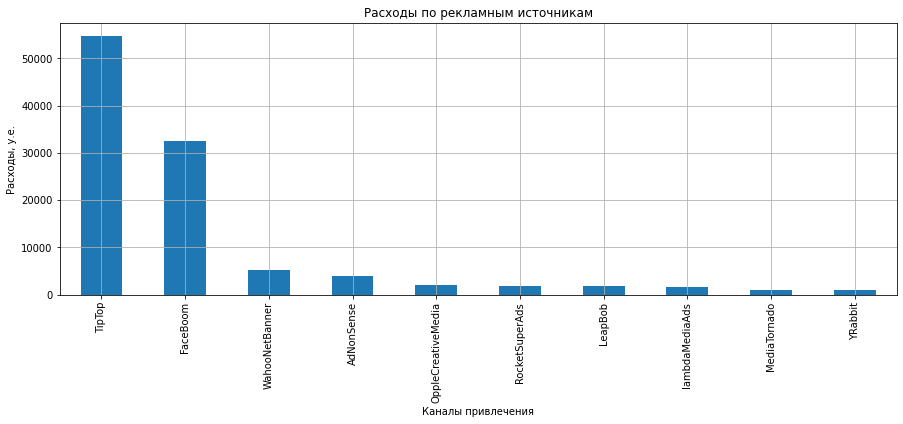

In [24]:
# Для наглядности можно посмотреть через график распределение расходов по рекламным источника 
(
    costs_info.groupby('channel')['costs'].sum().sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(15, 7), title='Расходы по рекламным источникам', 
          xlabel='Каналы привлечения', ylabel='Расходы, у.е.')
);


    
Промежуточный вывод.<br>
<br>
Половина от всех затрат идут на канал "TipTop" (54751.30 у.е., что составляет ~52%), треть расходов уходит на "FaceBoom" (32445.60 у.е., что составляет ~31%), и на остальные каналы уходит по менее чем 5% расходов. <br>
Наглядно видно распределение на графике.
    

#### Строим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

In [30]:
# Создаем столбцы с номерами недель и месяцев
costs_info['dt'] = pd.to_datetime(costs_info['dt'])
costs_info['week'] = costs_info['dt'].dt.isocalendar().week
costs_info['month'] = costs_info['dt'].dt.month
costs_info.head(5)

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


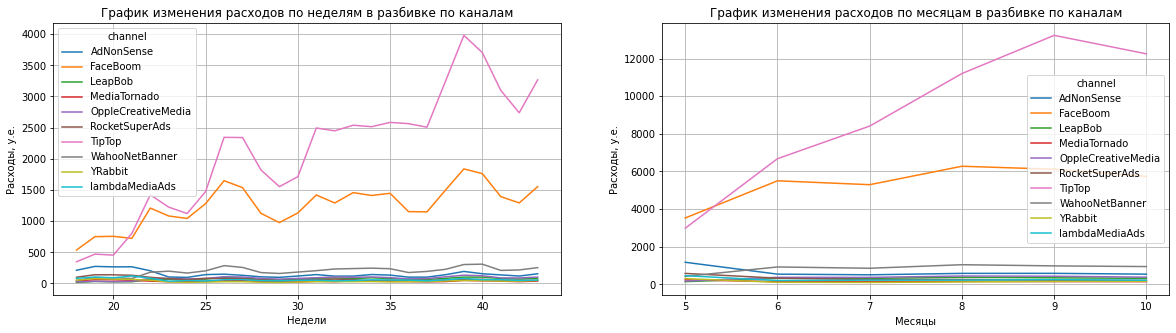

In [66]:
# Строим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

plt.figure(figsize=(20, 5))   #задаем размеры графика  

#создаем сводную таблицу по неделям 
costs_week = costs_info.pivot_table(index='week', 
                                    columns='channel', 
                                    values='costs', 
                                    aggfunc='sum')
#строим первый график 
costs_week.plot (grid=True, 
                 ax=plt.subplot(1, 2, 1)
                 )
plt.xlabel('Недели')
plt.ylabel('Расходы, у.е.')
plt.title('График изменения расходов по неделям в разбивке по каналам')

#создаем сводную таблицу по месяцам
costs_month = costs_info.pivot_table(index='month', 
                                     columns='channel', 
                                     values='costs', 
                                     aggfunc='sum')
#строим второй график
costs_month.plot (grid=True, 
                  #xticks=list(costs_month.columns.values), 
                  ax=plt.subplot(1, 2, 2))
plt.title('График изменения расходов по месяцам в разбивке по каналам')
plt.xlabel('Месяцы')
plt.ylabel('Расходы, у.е.')

plt.show()  


    
Промежуточный вывод.

Мы построили графики с динамикой изменения расходов по неделям и месяцам по каждому источнику. На обоих графиках мы видим, что самые высокие расходы у "TipTop", затем "FaceBoom", остальные каналы существенно находятся ниже, почти сливаясь. В начале мая даже "FaceBoom" опережал "TipTop", но не долго. С июня видим резкий рост расходов на "TipTop" до сентября месяца, в октябре затраты стали снижаться. В то время как расходы на "FaceBoom" имеют более стабильную динамику в диапозоне 6000 у.е. на протяжении рассматриваемого периода. 
    

#### Определим, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [32]:
# Привлечение одного пользователя (CAC) мы рассчитывали в профилях пользователей таблицы profiles - столбец "acquisition_cost".
# Группируем таблицу profiles по источникам каналов и находим среднее значение "acquisition_cost"

profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

In [60]:
# Посмотрим средний САС по всем пользователям 

round (profiles['acquisition_cost'].mean(), 2)


0.7


    
Промежуточный вывод.<br>
Самый дорогой пользователь вышел у рекламного источника "TipTop", средняя стоимость привлечения = 2,8 у.е. Далее с небольшой разницей идут источники  "FaceBoom" = 1,11 у.е. и "AdNonSense" = 1.0 у.е.. У остальных каналов САС одного пользователя менее единицы.<br>
    средний САС по проекту = 0.7

<b> Общий вывод по этапу "Маркетинг".<br></b>
<br>
Общая сумма расходов на маркетинг за период с 1 мая по 27 октября 2019 года: составила 105497 у.е. Половина всех затрат идут на канал "TipTop" (54751.30 у.е., что составляет ~52%), треть расходов уходит на "FaceBoom" (32445.60 у.е., что составляет ~31%), и на остальные каналы уходит по менее чем 5% расходов.<br> 
<br>
Также мы построили графики с динамикой изменения расходов по неделям и месяцам по каждому источнику. На обоих графиках мы видим, что самые высокие расходы у "TipTop", затем "FaceBoom", остальные каналы существенно находятся ниже, почти сливаясь. С июня видим резкий рост расходов на "TipTop" до сентября, в октябре затраты стали снижаться. В то время как расходы на "FaceBoom" имеют более стабильную динамику в диапозоне 6000 у.е. на протяжении рассматриваемого периода.<br>
    <br>
В конце мы определили среднюю стоимость привлечения одного пользователя. Самый дорогой пользователь вышел у рекламного источника "TipTop", средняя стоимость привлечения = 2,8 у.е. Далее с небольшой разницей идут источники "FaceBoom" = 1,11 у.е. и "AdNonSense" = 1.0 у.е.. У остальных каналов САС одного пользователя менее единицы.   <br>

Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.
    <br>
    
Подводя итоги мы видим, что половина бюджета на маркетинг тратится на канал привлечения "TipTop" и он имеет самого дорого привлеченного пользователя (САС = 2,8 у.е.) также "FaceBoom" берет на себя треть бюджета, остаточная часть бюджета распредлеяется между остальными каналами.  
    


### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Допустим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели (14) после привлечения. 

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на следующие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?


In [25]:
# убираем органических пользователей, т.к. они могут исказить показатели оценки окупаемости рекламы
# поскольку мы за них ничего не платим,  а нам нужно изучить именно окупаемость рекламы.

profiles_no_organic = profiles.query('channel != "organic"')

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

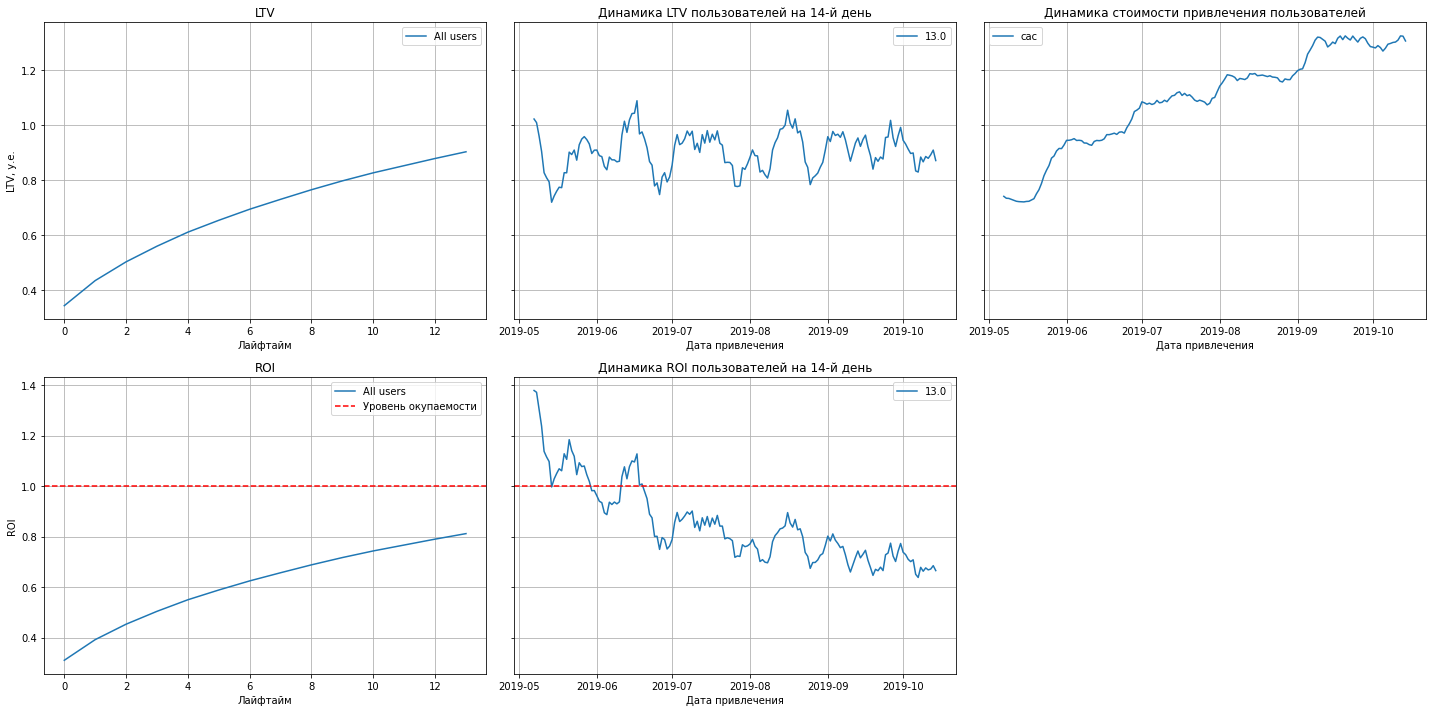

In [70]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders_info, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


Выводы по всем странам: <br>
- LTV -  этот показатель достаточно стабилен. Качество пользователей не меняется. Однако, значение LTV меньше 1.<br>
- САС - динамика стоимости привлечения пользователей имеет восходящую тенденцию, т.е. идет увеличение рекламного бюджета, с мая - каждый месяц идет увеличение стоимости до сентября, в сентябре-октябре стоимость примерно на одном уровне.<br>
- Реклама не окупается. ROI к концу 14 дня — чуть выше 80%.<br>

Наблюдаем, что динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.


#### Проверяем конверсию пользователей и динамику её изменения. То же самое делаем с удержанием пользователей. Строим и изучаем графики конверсии и удержания.

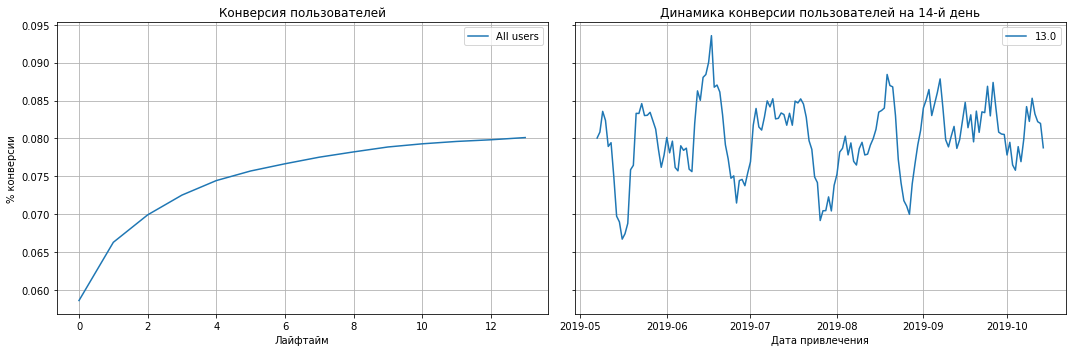

In [73]:
# смотрим конверсию пользователей

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders_info, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Конверсия по всем пользователям достигает 80%. Конверсия хорошая и постоянная. Динамика более-менее стабильная, есть повторяющиеся спады в конце месяца, но к началу следующего месяца видим рост конверсии.
    

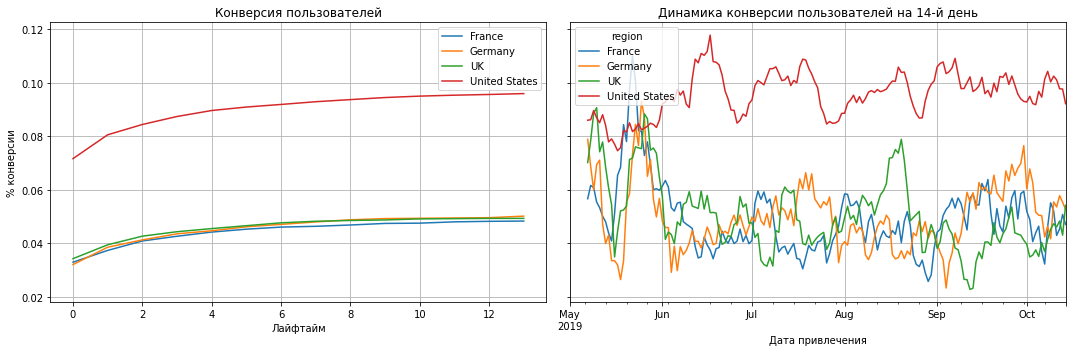

In [74]:
# смотрим конверсию пользователей по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В разбивке по странам мы видим, что конверсия в США больше в разы, чем у европейских странах, а у Франции, Германии, Англии - практически одинаковы, графики сливаются.
    

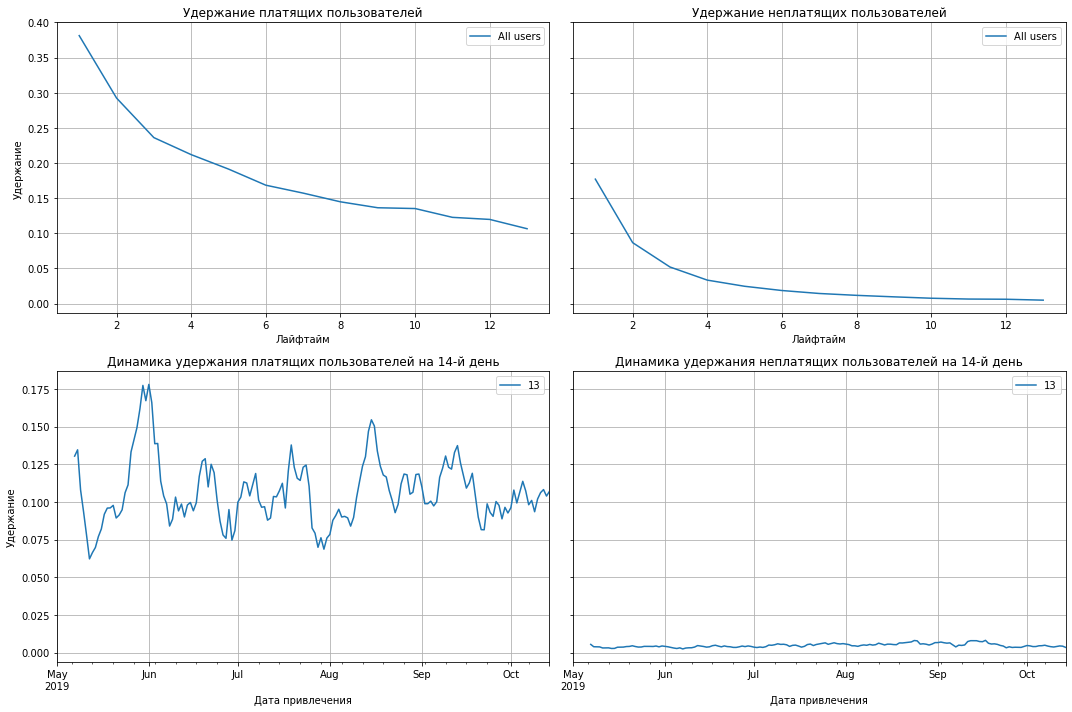

In [75]:
# смотрим удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits_info, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 


На данных графиках -ничего не бросается в глаза, все в рамках нормы, резких падений не наблюдается (говорящих о неправильности подсчетов).    
По общим пользователям видим снижение удержания платящих пользователей к концу второй неделе, что является нормальным явлением. 
График по неплатящим пользователям ниже, чем по платящим. 


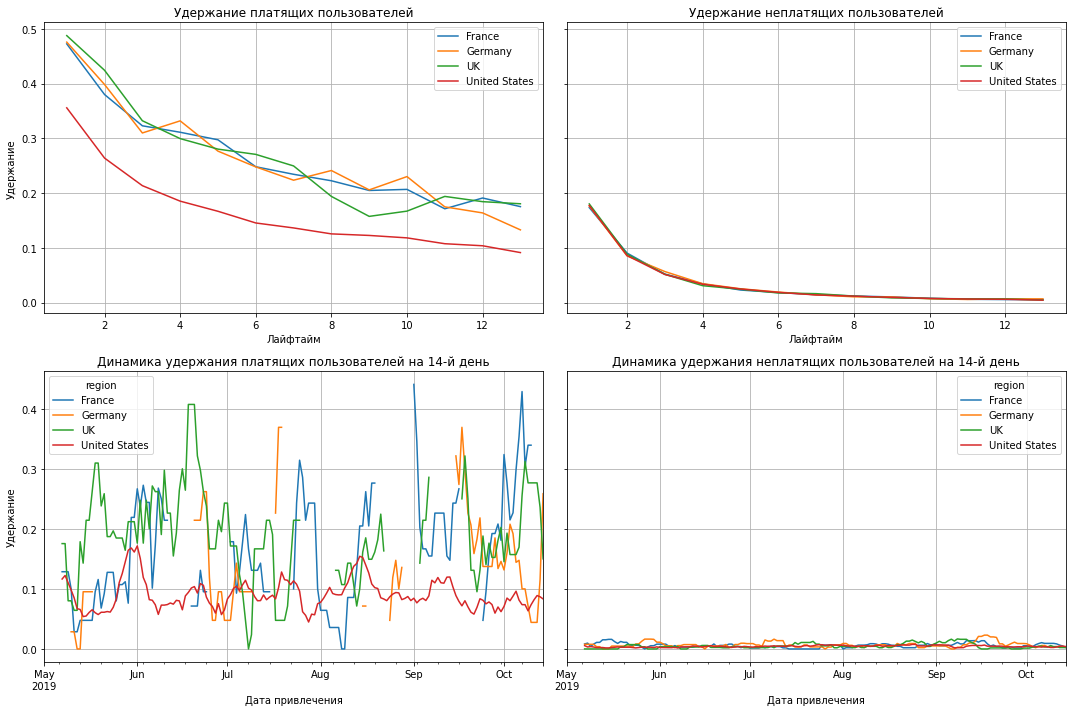

In [76]:
# смотрим удержание пользователей в разбивке по странам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits_info, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 


Смотрим удержание пользователей в разбивке по странам и видим интересную картину. Самый низкий показатель у США, когда в этой стране выше всех конверсия. Значит в США получается хорошо конвертировать покупателей, но плохо получается их удерживать, по сравнению со странами Европы (Англия, Франция, Германия). <br>

Удержание неплатящих пользователей одинаково во всех странах


#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

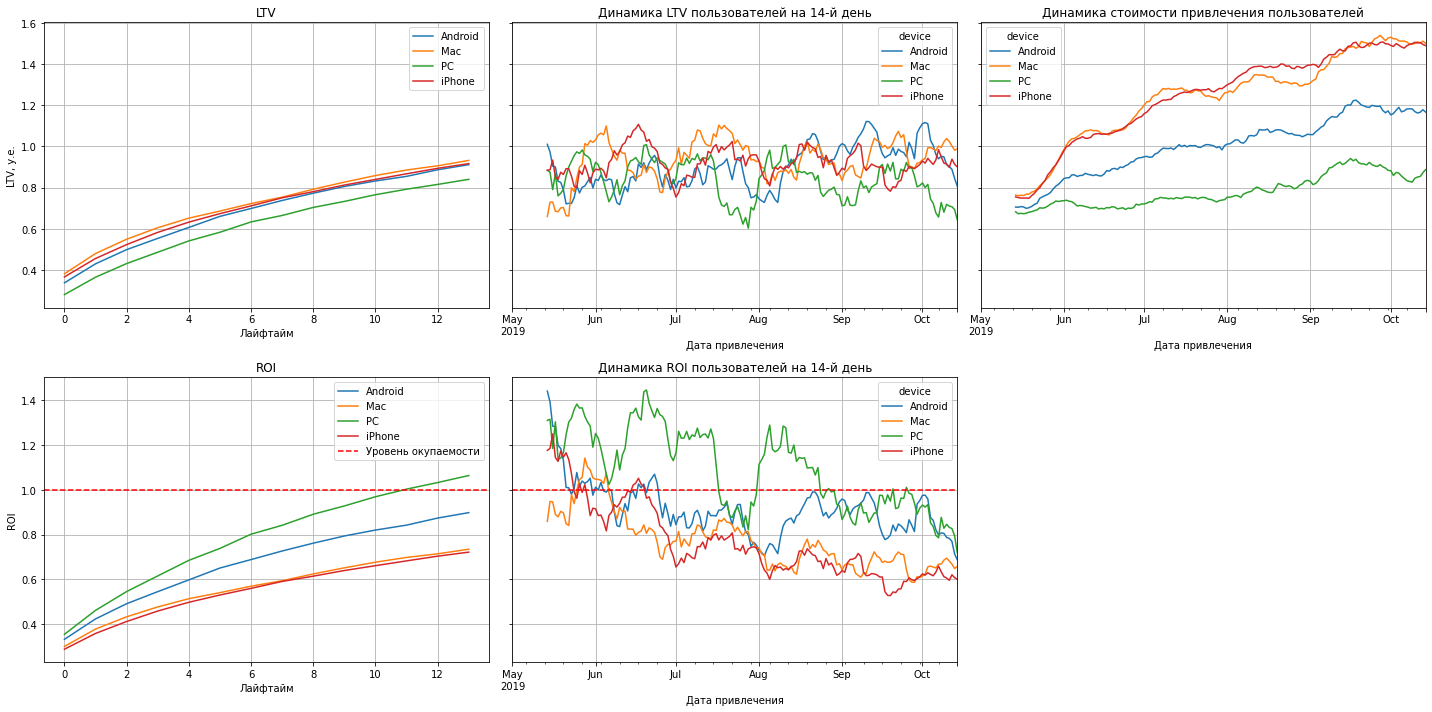

In [77]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Вывод <br>
- Стабильное качество пользователей - динамика LTV всё так же стабильна.<br>
- Плавное увеличение стоимости привлечения пользователей, больше всего тратят и увеличивают бюджет на устройства iPhone, Mac, а динамика РС практически без изменений. <br>
- Однако реклама окупается только у пользователей РС, в то время как у яблочных устройств ROI чуть выше 70%. Android показатели лучше = 90%.<br>


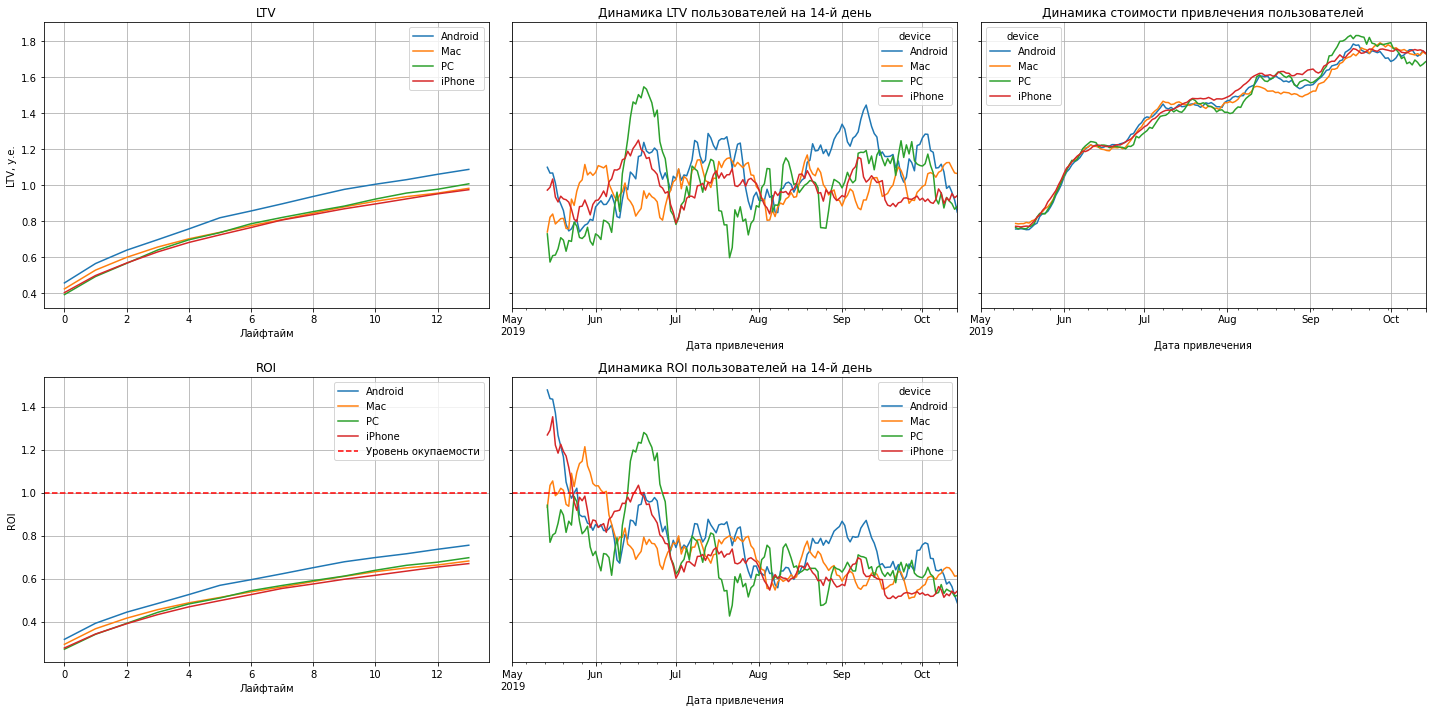

In [78]:
# смотрим окупаемость с разбивкой по устройствам только в США

dimensions = ['device']
profiles_no_organic_usa = profiles_no_organic.query('region =="United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic_usa, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Смотрим окупаемость рекламы с разбивкой по устройствам только в США.<br>

- В США окупаемости рекламы нет ни у одного устройства, ROI не достигает 80%. К тому же, окупаемость Android немного выше, чем у других устройств.<br>
- Видим стабильный рост стоимости привлечения пользователей по всем устройствам одновременно.<br>


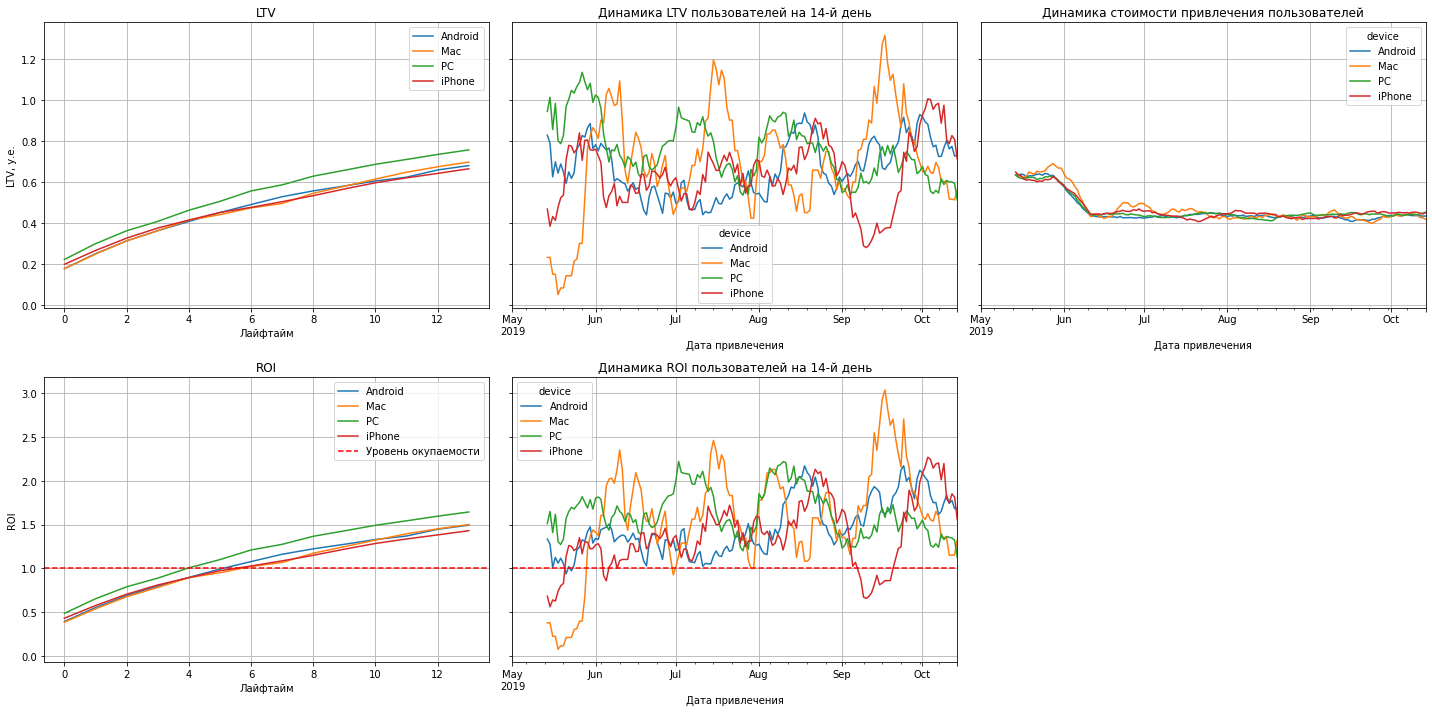

In [79]:
# смотрим окупаемость с разбивкой по устройствам только в Европе

dimensions = ['device']
profiles_no_organic_europe = profiles_no_organic.query('region !="United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic_europe, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Cмотрим окупаемость рекламы с разбивкой по устройствам только в Европе<br>

В европейских странах окупаемость гораздо лучше , чем в США. С 5го дня на всех устройствах происходит окупаемость рекламы (в то время, как в США совсем не настает такой день). <br>
- Совсем другая картина с динамикой стоимости привлечения пользоватлей: в европейских странах по всем устройствам мы видим даже снижение в июне, и стабильное неизменение графика на протяжении остальных месяцев. Это означает, что не было увеличение рекламного бюджета. 
    

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


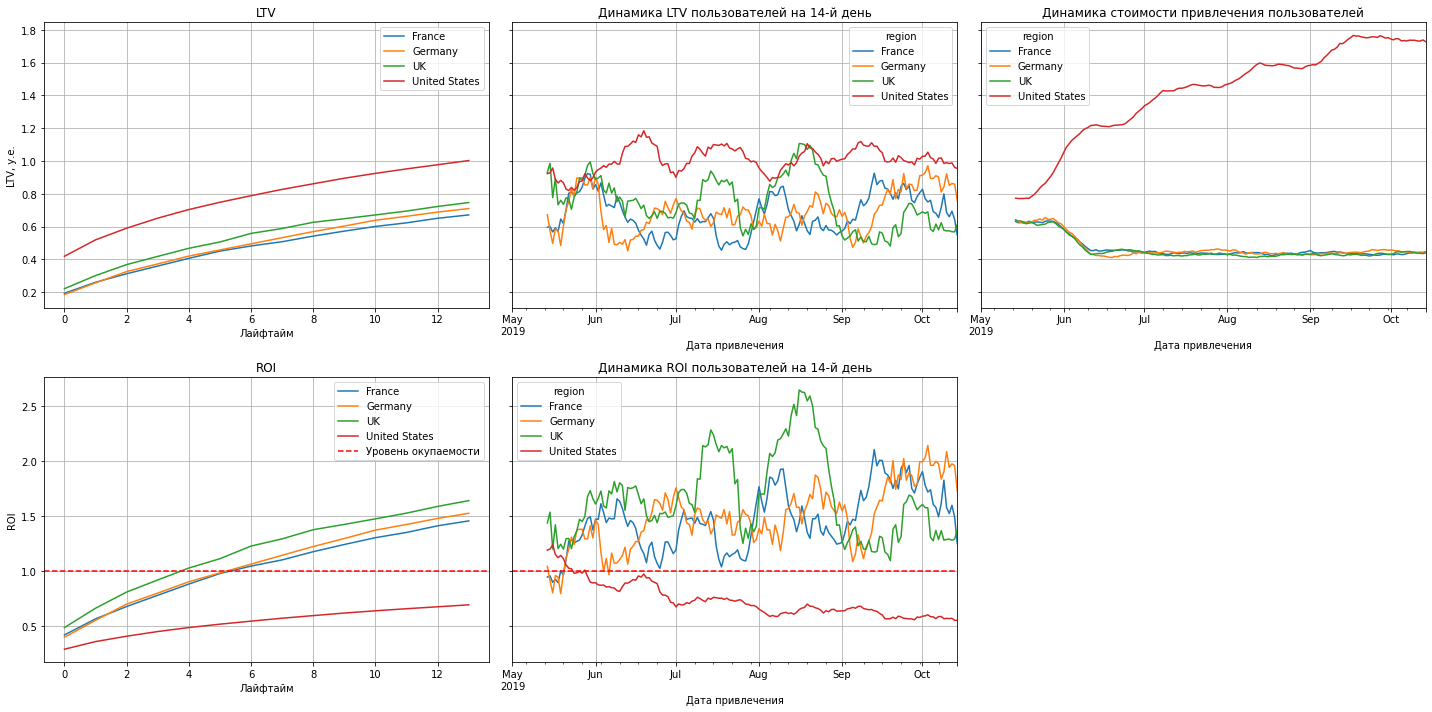

In [80]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Вывод, что говорят графики по окупаемости рекламы с разбивкой по странам:<br>
    
- Реклама на протяжении 14дней не окупается только в США. В Англии окупается лучше всего, начиная с 4го дня, в Германии и Франции - с 6го дня.  <br>
- График по динамике стоимости привлечения пользователей показывает, что с июня идет постоянный рост стоимости только в США, в тоже самое время в европейских странах идет снижение и с середины июня на протяжении всех месяцев стоимость стабильна у всех стран (значит увеличивали рекламный бюджет только в США).<br>
- LTV всё так же стабилен.<br>

Нужно разбираться детальнее с рекламой в США, тем более, что это наш основной рынок.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

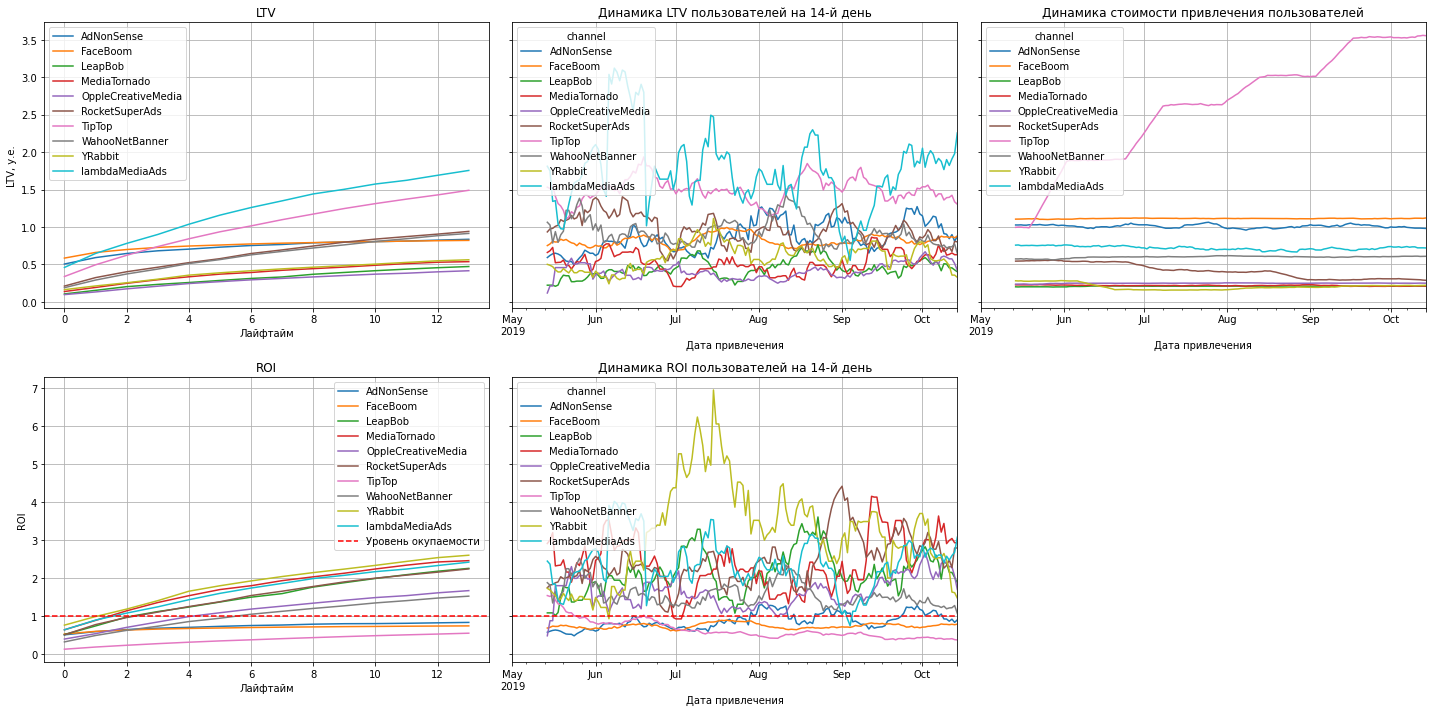

In [81]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Выводы по окупаемости рекламы с разбивкой по источникам привлечения по всем странам:<br>
    
- Реклама окупается практически у всех каналов, кроме TipTop, FaceBoom (возможно это связано с тем, что именно в эти каналы вливаются бОльшая часть рекламного бюджета, и чтобы им окупится необходимо больше отдачи, чем от других каналов), AdNonSense. YRabbit - окупается на второй день, к третьему дню - lambdaMediaAds, MediaTornado, потом LeapBob и RocketSuperAds.<br>
- lambdaMediaAds - имеет LTV больше, чем у TipTop. Качество пользователей - стабильное. <br>
- Динамика стоимости привлечения пользователей говорит, что в канал TipTop постоянно увеличивали рекламный бюджет (график ступенчато постоянно растет), в то время как у остальных каналов САС стабильный без изменений. <br>


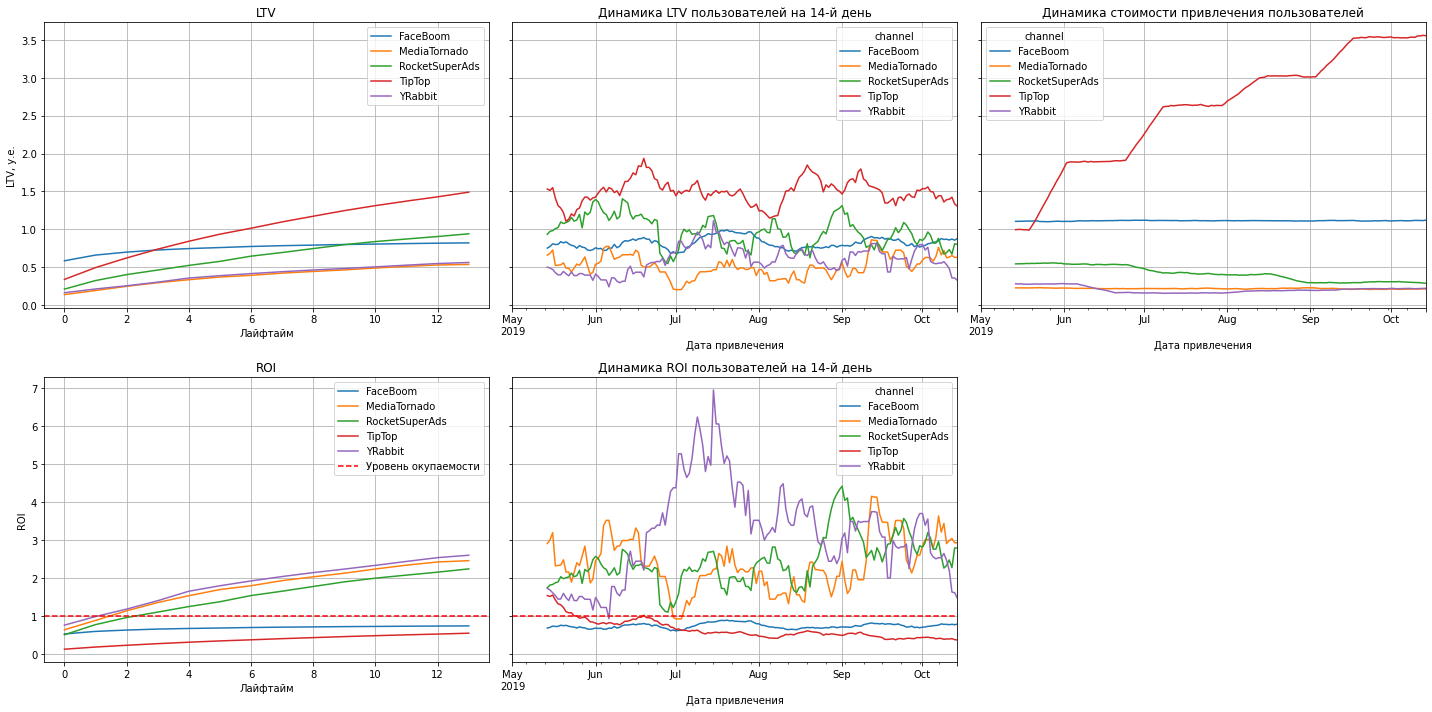

In [82]:
# смотрим окупаемость с разбивкой по источникам привлечения только в США

dimensions = ['channel']
profiles_no_organic_usa = profiles_no_organic.query('region =="United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic_usa, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Выводы по окупаемости рекламы с разбивкой по источникам привлечения только в США:

- Динамика стоимости привлечения пользователей такая же как и смотрели выше: постоянный рост у канала "TipТop", на фоне неизменной стабильности других каналов. 
- Окупаемость есть у всех каналов, кроме "TipТop" и "FaceBoom".


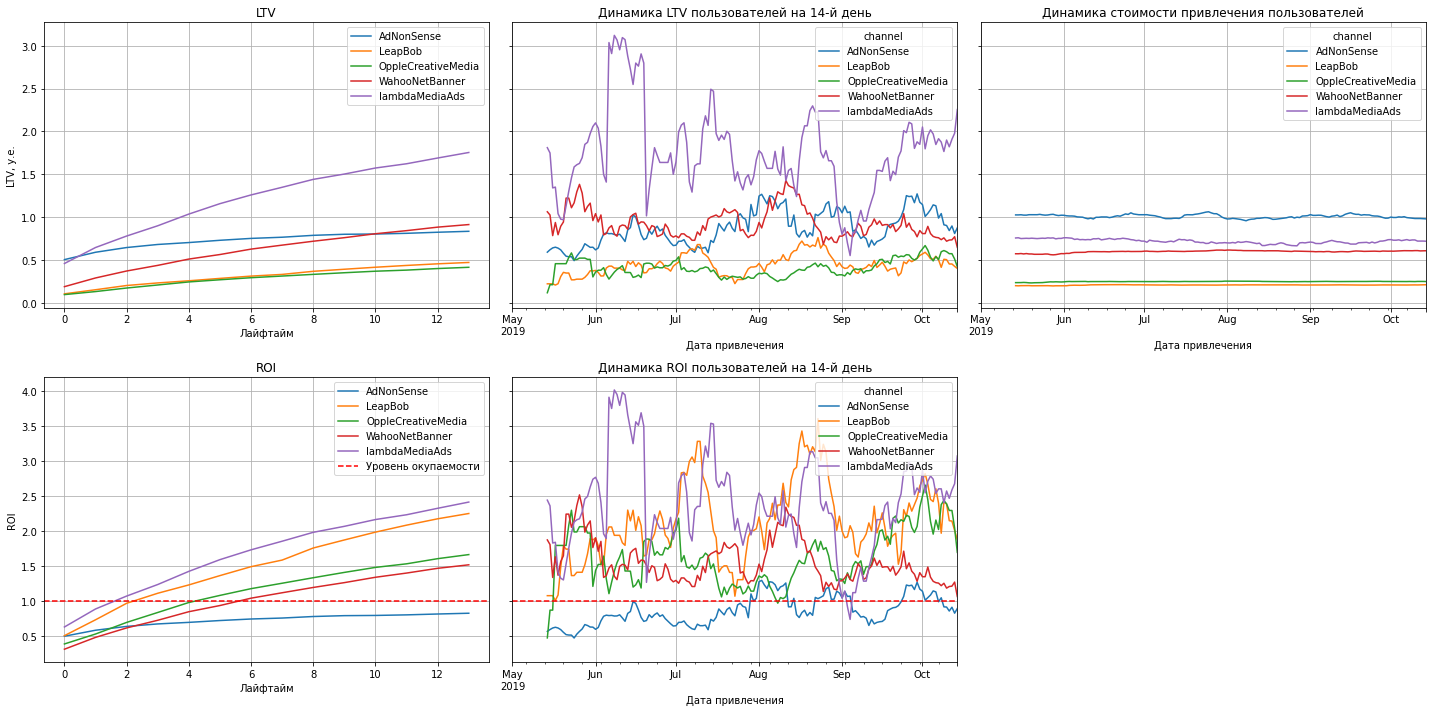

In [83]:
# смотрим окупаемость с разбивкой по источникам привлечения только в Европе

dimensions = ['channel']
profiles_no_organic_europe = profiles_no_organic.query('region !="United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic_europe, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Выводы по окупаемости с разбивкой по источникам привлечения только в Европе:<br>
- Стоимость привлечения пользователей - стабильна. В Европе не увеличивают бюджет на рекламу.<br>
- Окупаемость каналов начинается с третьего дня, кроме "AdNonSense", который совсем не окупается. Больше всех окупаемости у канала "lambdaMediaAds" 


<b> Общий вывод по окупаемости рекламы </b>. <br>
<br>
В общем (по всем странам и по всем пользователям):<br>
- Реклама не окупается, в то время как динамика стоимости привлечения пользователей имеет восходящую тенденцию, т.е. идет увеличение рекламного бюджета. <br>
- LTV - этот показатель достаточно стабилен. Качество пользователей не меняется. <br>
<br>
Окупаемость рекламы в разбивке <b> по странам </b> :<br>
Реклама на протяжении 14дней не окупается только в США. В Англии окупается лучше всего, начиная с 4го дня, в Германии и Франции - с 6го дня.<br>
График по динамике стоимости привлечения пользователей показывает, что с июня идет постоянный рост стоимости только в США, в тоже самое время в европейских странах идет снижение и с середины июня на протяжении всех месяцев стоимость стабильна у всех стран (значит увеличивали рекламный бюджет только в США).<br>

    
<b> Конверсия </b> по всем пользователям достигает 80%. Конверсия хорошая и постоянная.<br>
В разбивке по странам мы видим, что конверсия в США больше в разы, чем во Франции, Германии, Англии - практически одинаковы, графики сливаются.<br>


<b> Удержание</b> всех пользователей: На данных графиках -ничего не бросается в глаза, все в рамках нормы, резких падений не наблюдается (говорящих о неправильности подсчетов). <br>
Смотрим удержание пользователей в разбивке по странам и видим интересную картину. Самый низкий показатель у США, когда в этой стране выше всех конверсия. Значит в США получается хорошо конвертировать покупателей, но плохо получается их удерживать, по сравнению со странами Европы (Англия, Франция, Германия).<br>
<br>

Дтеально разберемся с окупаемостью рекламы в разных категоряих.<br><br>
Окупаемость с разбивкой <b> по устройствам </b>:<br>
- Реклама окупается только у пользователей РС, в то время как у яблочных устройств ROI чуть выше 70%. Android показатели лучше = 90%.   <br>
- Плавное увеличение САС, больше всего тратят и увеличивают бюджет на устройства iPhone, Mac, а динамика РС практически без изменений.<br>
<br>
Заглянем в разбивке по странам:<br>
- Окупаемость рекламы с разбивкой по устройствам <b> только в США </b>.<br>
В США окупаемости рекламы нет ни у одного устройства, ROI не достигает 80%. К тому же, окупаемость Android немного выше, чем у других устройств. <br>
Видим стабильный рост стоимости привлечения пользователей по всем устройствам одновременно.<br><br>
- Окупаемость рекламы с разбивкой по устройствам <b> только в Европе </b>.<br>
В европейских странах окупаемость гораздо лучше, чем в США. С 5го дня на всех устройствах происходит окупаемость рекламы. <br>
Динамика САС - видим снижение в июне, и стабильное неизменение графика на протяжении остальных месяцев.<br>
<br>

Окупаемость с разбивкой <b> по источникам привлечения </b> по всем странам:<br>
Реклама окупается практически у всех каналов, кроме TipTop, FaceBoom, AdNonSense. YRabbit - окупается на второй день, к третьему дню - lambdaMediaAds, MediaTornado, потом LeapBob и RocketSuperAds.<br>
lambdaMediaAds - имеет LTV больше, чем у TipTop. Качество пользователей - стабильное.<br>
Динамика стоимости привлечения пользователей говорит, что в канал TipTop постоянно увеличивали рекламный бюджет (график ступенчато постоянно растет), в то время как у остальных каналов САС стабильный без изменений.<br>
<br>
Заглянем в разбивке по странам:<br>
- Окупаемость с разбивкой по источникам привлечения <b> только в США </b> :<br>
Динамика стоимости привлечения пользователей такая же как и смотрели выше: постоянный рост у канала "TipТop", на фоне неизменной стабильности других каналов. Окупаемость есть у всех каналов, кроме "TipТop" и "FaceBoom".<br>
<br>
- Окупаемость с разбивкой по источникам привлечения <b> только в Европе </b> :<br>
    - Стоимость привлечения пользователей - стабильна. В Европе не увеличивали бюджет на рекламу.<br>
    - Окупаемость каналов начинается с третьего дня, кроме "AdNonSense", который совсем не окупается. Больше всех окупаемости у канала "lambdaMediaAds"
    


Итого <br>
Графики показывают, что там , куда тратится больше всего денег - из стран - это США, из устройств - iPhone и Mac, из каналов - это TipTop и FaceBoom, совсем нет окупаемости рекламы и идет постоянное увеличение САС. <br>
<br>
В то время как европейские страны, Андройд и РС и другие каналы рекламы - имеют гораздо лучше показатели окупаемости, и совсем незначительный бюджет. Возможно стоит пересмотреть распределение расходов и увеличить их долю. 
    

#### Дополнительные вопросы:

##### Окупается ли реклама, направленная на привлечение пользователей в целом?

Нет, в целом (по всем странам и по всем пользователям) реклама не окупается. ROI к концу 14 дня — чуть выше 80%. - см. п.5.1

##### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Нет окупаемости рекламы: <br>
- По устройствам - iPhone и Mac, <br>
- По странам - только в США, <br>
- По каналам - TipTop и FaceBoom в США, AdNonSense - в Европе.  


### Общие выводы
<br>

Можно предположить следующие <b> причины неэффективности </b> привлечения пользователей: <br>
- концетрация на одном сегменте рынка по странам - США, упускают европейскую часть рынка. <br>
- по графикам видно, что отдел маркетинга сделал ставку на два канала TipTop и FaceBoom, в то время как показатели эффективности у них не самые высокие, другие каналы рекламы показывают лучшею окупаемость. Почему идет "накачивание" только в TipTop? => Неэффективное распределение бюджета по рекламным кампаниям.<br>


Для рекомендаций отделу маркетинга, сделаем еще несколько графиков конверсии и удержания в разбивке по рекламным источникам, чтобы предложить окупающие каналы с хорошей конверсией и удержанием + в привязке по регионам. 


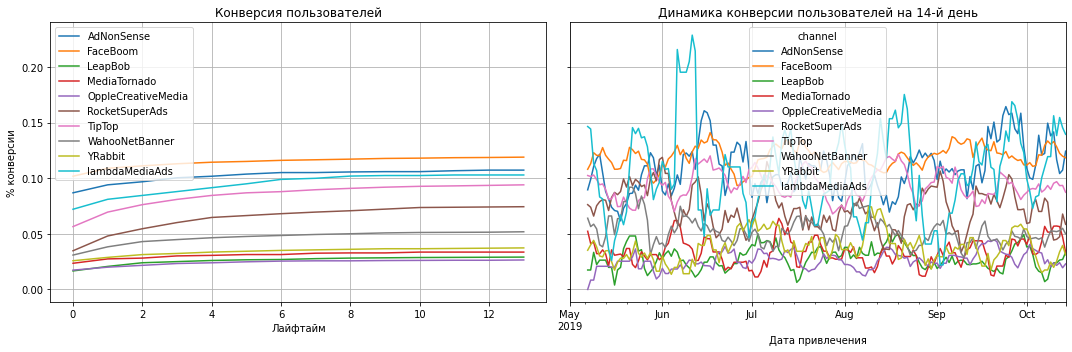

In [84]:
# смотрим конверсию пользователей по каналам:

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders_info, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Высокая конверсия у FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds, WahooNetBanner.
Из вышеперечисленных нас может заинтересовать lambdaMediaAds, WahooNetBanner (европейский рынок) и RocketSuperAds (США)

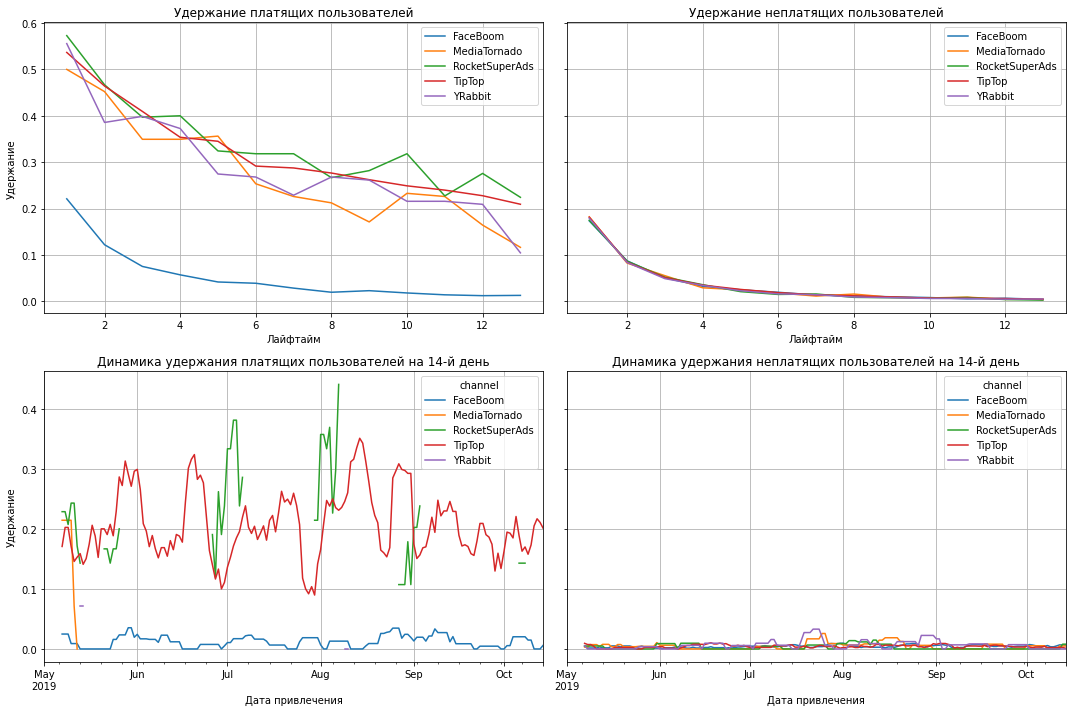

In [85]:
# смотрим удержание пользователей по каналам только в США:

profiles_no_organic_usa = profiles_no_organic.query('region =="United States"')

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic_usa, visits_info, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

На графике удержания платящих пользователей на рынке США нас могут заинтересовать следующие каналы: RocketSuperAds.
MediaTornado и YRabbit - в меньшей степени. 

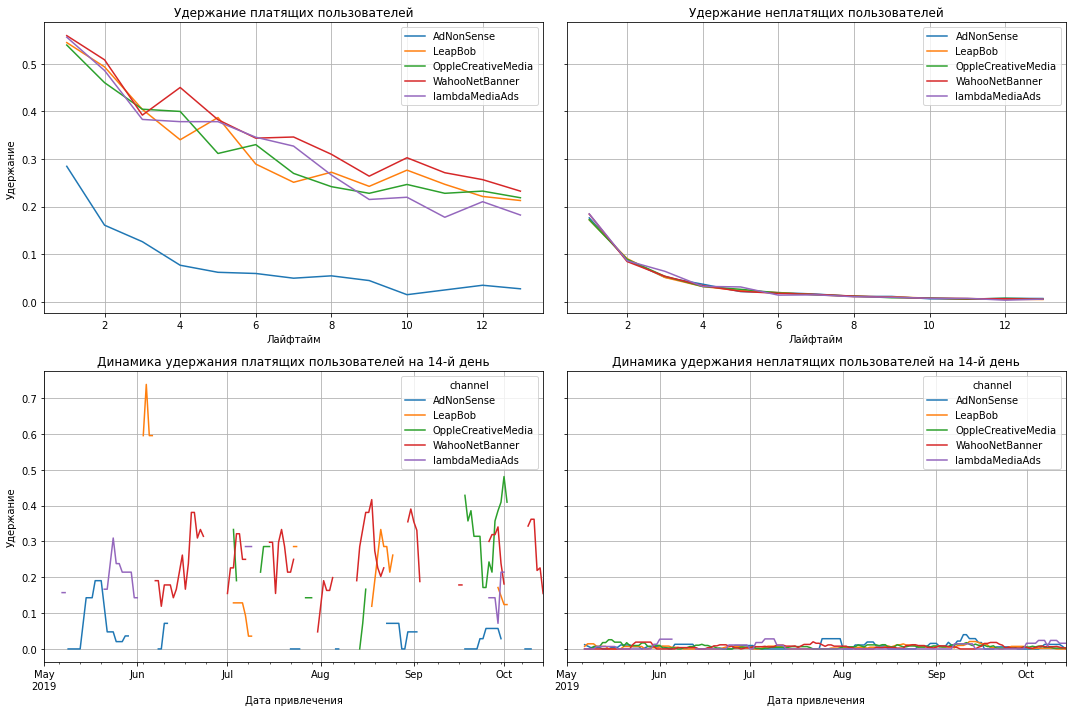

In [86]:
# смотрим удержание пользователей по каналам только в Европе

profiles_no_organic_europe = profiles_no_organic.query('region !="United States"')

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic_europe, visits_info, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

На графике удержания платящих пользователей на рынке Европы нас могут заинтересовать следующие каналы: WahooNetBanner


Просмотрев графики, можем предложить уделить внимание следующим каналам:<br>
 - Европейский рынок: WahooNetBanner - хорошие показатели по конверсии и удержанию.  <br>
lambdaMediaAds - высокая окупаемость, хорошая конверсия, но удержание ниже, чем вышеуказанного рекламного источника.<br>
- США: RocketSuperAds - хорошие показатели по конверсии и удержанию. <br>
<br>
В целом, больше уделить внимание европейскому рынку (чтобы "хранить яйца в разных корзинах")
 

### Подводим итоги

Мы провели анализ данных развлекательного приложения Procrastinate Pro+. <br>
<br><br>
Увидели проблему на графиках: несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.
Изучили следующие показатели:<br>
- откуда приходят пользователи и какими устройствами они пользуются,<br>
- сколько стоит привлечение пользователей из различных рекламных каналов;<br>
- сколько денег приносит каждый клиент,<br>
- когда расходы на привлечение клиента окупаются,<br>
- какие факторы мешают привлечению клиентов.<br>
<br>
Для этого мы провели следующую работу.<br>
<br>
Первым шагом - загрузили необходимые таблицы в переменные, предварительно ознакомились с данными, сделали подготовку данных. Проверили на пропуски и дубликатов, которых не обнаружили.<br>
<br>
Вторым шагом - мы сделали подготовку с функциями для вычисления значений метрик, которые использовали при анализе. Мы подготовили функции: для создания профилей пользователей, для подсчёта Retention Rate, конверсии, LTV и ROI.
А также функции для построения графиков: для сглаживания данных, для построения графика Retention Rate, конверсии, LTV и ROI.
<br>
Третьим шагом - был исследовательский анализ данных.<br>
Мы составили таблицу с профилями клиентов, определили минимальную и максимальную даты привлечения пользователей - с 1 мая по 27 октября 2019 года. Проанализировали данные по признакам: - из какой страны пользователь, - каким устройством пользуется, - через какой рекламный источник приходит клиент.<br>
<br>
    Мы определили, что пользователи приходят в приложение из США, Англии, Франции и Германии, больше всего платящих пользователей приходят из США. Самая высокая доля платящих пользователей у США = 6,9%, у Германии = 4,11% (хотя количество пользователей в этой стране самое наименьшее), у Англии = 3,98%, у Франции = 3,8%<br>
<br>
    Мы определили, что клиенты используют следующие устройства (в порядке убывания): iPhone, Android, PC, Mac. Среди них, платящие пользователи больше предпочитают использовать устройство iPhone. Однако, больше всего процент платящих среди пользователей Мас, затем iPhone, меньше всего - РС.<br>
<br>
    Всего 11 каналов привлечения. ТОП-3: в приложение больше всего людей приходят сами - через канал "organic", следом идет "FaceBoom" (у него 12.2% платящих пользователей) и "TipTop". Однако, доля платящих пользователей высока у "AdNonSense" = 11,34% и "lambdaMediaAds" = 10,47%, которые занимают последние места по количеству привлечения пользователей, зато качественных, с высокой конверсией в платящих. Канал "TipTop" на 4месте с долей 10,47%, а "organic" - на последнем месте с долей 2,06% (самый массовый канал по приходу новых пользователей, но с самой низкой долей платящих клиентов).<br>
    <br>
    Таким образом, больше всего клиентов из США, чаще заходят в приложение через устройство iPhone, приходят через рекламный канал "FaceBoom".<br>
    <br>
Четвертым шагом - был анализ маркетинга.<br>
Общая сумма расходов на маркетинг за период с 1 мая по 27 октября 2019 года: составила 105497 у.е. Из которых половина всех затрат идут на канал "TipTop" (54751.30 у.е., что составляет ~52%), треть расходов уходит на "FaceBoom" (32445.60 у.е., что составляет ~31%), /однако реклама по этим каналам совсем не окупается, по сравнению с другими источниками/ и на остальные каналы уходит по менее чем 5% расходов /однако с хорошей окупаемостью/. <br>
<br>
В конце мы определили среднюю стоимость привлечения одного пользователя. Самый дорогой пользователь вышел у рекламного источника "TipTop", средняя стоимость привлечения = 2,8 у.е. Далее с небольшой разницей идут источники "FaceBoom" = 1,11 у.е. и "AdNonSense" = 1.0 у.е.. У остальных каналов САС одного пользователя менее единицы.<br>
<br>
Подводя итоги мы видим, что половина бюджета на маркетинг тратится на канал привлечения "TipTop" и он имеет самого дорого привлеченного пользователя (САС = 2,8 у.е.) также "FaceBoom" берет на себя треть бюджета, остаточная часть бюджета распредлеяется между остальными каналами.<br>
<br>
Пятым шагом - был анализ окупаемости рекламы по странам, по устройствам, по рекламным источникам. <br>
Когда смотрим показатели по всем странам и по всем пользователям:<br><br>
- Реклама не окупается, в то время как динамика стоимости привлечения пользователей имеет восходящую тенденцию, т.е. идет увеличение рекламного бюджета.<br>
- LTV - этот показатель достаточно стабилен. Качество пользователей не меняется.<br>
<br>
Когда смотрим окупаемость рекламы в разбивке по странам :<br>
Реклама не окупается только в США. В Англии окупается лучше всего, начиная с 4го дня, в Германии и Франции - с 6го дня.
График по динамике стоимости привлечения пользователей показывает, что постоянный рост стоимости есть только в США, в тоже самое время в европейских странах идет снижение и неизменность стоимости (значит увеличивали рекламный бюджет только в США).<br>
<br>
Конверсия по всем пользователям достигает 80%. Конверсия хорошая и постоянная. В разбивке по странам мы видим, что конверсия в США больше в разы, чем во Франции, Германии, Англии - практически одинаковы, графики сливаются.<br>
<br>
Удержание всех пользователей в разбивке по странам: самый низкий показатель у США, когда в этой стране выше всех конверсия. Значит в США получается хорошо конвертировать покупателей, но плохо получается их удерживать, по сравнению со странами Европы (Англия, Франция, Германия).<br>
<br>
Детально разберемся с окупаемостью рекламы в разных категоряих.
<br>
Окупаемость с разбивкой по устройствам : Реклама окупается только у пользователей РС. Плавное увеличение САС по устройствам iPhone, Mac.<br>
<br>
Заглянем в разбивке по странам: В США окупаемости рекламы нет ни у одного устройства, ROI не достигает 80%. Видим стабильный рост стоимости привлечения пользователей по всем устройствам одновременно. В европейских странах окупаемость гораздо лучше, чем в США. С 5го дня на всех устройствах происходит окупаемость рекламы. Динамика САС - видим снижение в июне, и стабильное неизменение графика на протяжении остальных месяцев.<br>
<br>
Окупаемость с разбивкой по источникам привлечения по всем странам:<br>
Реклама окупается практически у всех каналов, кроме TipTop, FaceBoom, AdNonSense. YRabbit - окупается на второй день, к третьему дню - lambdaMediaAds, MediaTornado, потом LeapBob и RocketSuperAds.
lambdaMediaAds - имеет LTV больше, чем у TipTop. Качество пользователей - стабильное.
Динамика стоимости привлечения пользователей говорит, что в канал TipTop постоянно увеличивали рекламный бюджет (график ступенчато постоянно растет), в то время как у остальных каналов САС стабильный без изменений.<br>
<br>
Таким образом, графики показывают, что там , куда тратится больше всего денег - из стран - это США, из устройств - iPhone и Mac, из каналов - это TipTop и FaceBoom, совсем нет окупаемости рекламы и идет постоянное увеличение САС.<br>
<br>
В то время как европейские страны, Android и РС, и другие каналы рекламы - имеют гораздо лучше показатели окупаемости, и совсем незначительный бюджет. Возможно стоит пересмотреть распределение расходов и увеличить их долю.<br>
<br>

К причинам неэффективности привлечения пользователей можно предположить:<br>
- Неэффективное распределение бюджета по рекламным кампаниям:  по графикам видно, что отдел маркетинга сделал ставку на два канала TipTop и FaceBoom, в то время как показатели эффективности у них не самые высокие, другие каналы рекламы показывают лучшею окупаемость.<br>
- концетрация на одном сегменте рынка по странам - США, упускают европейскую часть рынка.<br>
<br>

К рекомендациям можно предложить:<br>
- В целом, больше уделить внимание европейскому рынку (чтобы "хранить яйца в разных корзинах")<br>
- уделить внимание следующим каналам на европейском рынке: WahooNetBanner - хорошие показатели по конверсии и удержанию.
lambdaMediaAds - высокая окупаемость, хорошая конверсия, но удержание ниже, чем вышеуказанного рекламного источника.<br>
- на американском рынке: RocketSuperAds - хорошие показатели по конверсии и удержанию.

